# Capstone Project 2: Indonesia Tourism Recommender System

### Problem Statement:

Indonesia wants to boost its tourism industry using advanced machine-learning techniques. You’re tasked with using the tourism data collected by the Indonesian government to understand tourist preferences and build a recommender system to recommend places to tourists.

### Overview:

For effective marketing, it is of utmost importance to understand the customers(tourists) and their expectations. The recommender system is a great technique to augment the existing marketing outreach to prospects. This project requires you to perform exploratory data analysis and create a recommender system.

### Input Dataset:

The government has provided you with three input files:

- tourism_with_id.xlsx - it has information on tourist attractions in 5 major cities of Indonesia. </br>
- user.csv - it contains demographic information about the users to make recommendations. </br>
- tourism_rating.csv - it contains 3 columns - the user, the place, and the rating given, and serves to create a recommendation system based on the rating.</br>


### Directions:

1. Import all the datasets and perform a preliminary inspection. </br>
    a. Check for missing values and duplicates. </br>
    b. Remove any anomalies found in the data. </br>


2. Explore the data in depth to understand the tourism patterns. </br>
    a. Explore the user group that provides the tourism ratings by answering the following questions: </br>
        i. The age distribution of users visiting the places and giving the ratings.
        ii. What are the places from where most of these users (tourists) are coming from?
    b. Explore the locations and categories of tourist spots by answering the following questions: </br>
        i. What are the different categories of tourist spots?
        ii. What kind of tourism each city/location is most famous or suitable for?
        iii. Which city would be best for a nature enthusiast to visit?
        iv. What is the average price/cost of these places?
    c. Create combined data with places and their user ratings.
    d. Use this data to figure out the spots that are most loved by the tourists. Also, which city has the most loved tourist spots? </br>
    e. Indonesia provides a wide range of tourist spots ranging from historical and cultural beauties to advanced amusement parks. What category of places are the most popular among tourists? </br>


3. Build a Recommendation model for the tourists. </br>
    a.  Use the above data to develop a collaborative filtering model for recommendation. And use that to recommend other places to visit using the current tourist location (place name). </br>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import all the datasets and perform the preliminary inspection.

> *   Check for missing values and duplicates.
> *   Remove any anomalies found in the data.


In [ ]:
tourism_with_id = pd.read_excel('tourism_with_id.xlsx')
tourism_rating = pd.read_csv('tourism_rating.csv')
user = pd.read_csv('user.csv')

In [ ]:
tourism_with_id.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Culture,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Culture,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2


In [ ]:
user.head(2)

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21


In [ ]:
tourism_rating.head(2)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2


In [ ]:
tourism_with_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [ ]:
tourism_with_id.isna().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


In [ ]:
tourism_with_id.columns

Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

## Remove columns:
Remove the excess or unnecessary columns from the dataset.

In [ ]:
# Remove the excess columns from tourism_with_id[]
tourism_with_id.drop(columns = ['Unnamed: 11', 'Unnamed: 12', 'Time_Minutes', 'Coordinate'], inplace = True)

In [ ]:
tourism_with_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     437 non-null    int64  
 1   Place_Name   437 non-null    object 
 2   Description  437 non-null    object 
 3   Category     437 non-null    object 
 4   City         437 non-null    object 
 5   Price        437 non-null    int64  
 6   Rating       437 non-null    float64
 7   Lat          437 non-null    float64
 8   Long         437 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 30.9+ KB


In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [ ]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
tourism_with_id.columns = tourism_with_id.columns.str.strip()

# 2. To understand the tourism highlights better, we should explore the data in depth.
## a. Explore the user groups used to get the tourism ratings.
> 1. The age distribution of users visiting the places and giving the ratings.


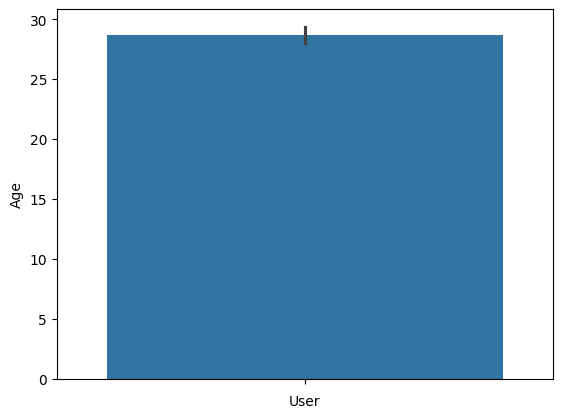

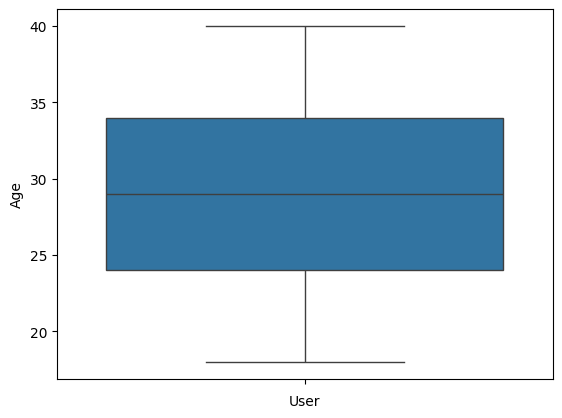

In [ ]:
# Create a bar plot and box plot to visualize the age distribution of the tourists visiting Indonesia.
p1 = sns.barplot(user, y="Age")
plt.xlabel("User")
plt.show(p1)
p2 = sns.boxplot(user, y="Age")
plt.xlabel("User")
plt.show(p2)


> 2. What are the places from where most of these users (tourists) are coming from?

In [ ]:
user['city'] = user.Location.apply(lambda x: x.split(",")[0])
user.head()

,User_Id,Location,Age,city
0,1,"Semarang, Jawa Tengah",20,Semarang
1,2,"Bekasi, Jawa Barat",21,Bekasi
2,3,"Cirebon, Jawa Barat",23,Cirebon
3,4,"Bekasi, Jawa Barat",21,Bekasi
4,5,"Lampung, Sumatera Selatan",20,Lampung


Text(0.5, 1.0, 'Most Frequented City')

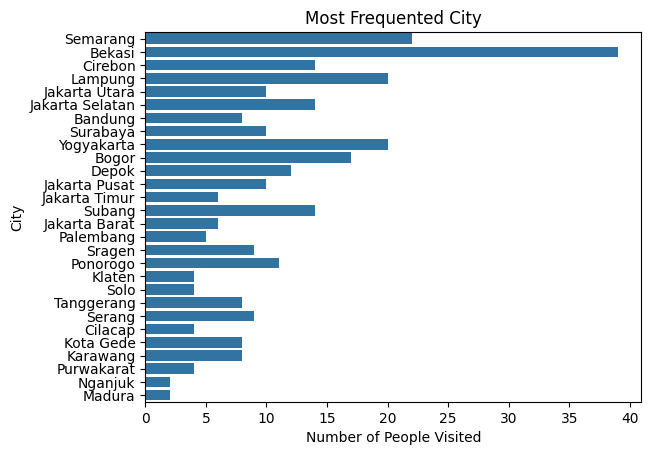

In [ ]:
# Visualize the most frequented cities in Indonesia
sns.countplot(data=user, y="city")
plt.xlabel("Number of People Visited")
plt.ylabel("City")
plt.title("Most Frequented City")

## b. Next, explore the locations and categories of tourist spots.

> 1. What are the different categories of tourist spots?

In [ ]:
tourism_with_id.Category = tourism_with_id.Category.str.strip().str.capitalize()
#print(tourism_with_id.Category.unique())
tourism_with_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Culture,Jakarta,20000,4.6,-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Culture,Jakarta,0,4.6,-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Amusement parks,Jakarta,270000,4.6,-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Amusement parks,Jakarta,10000,4.5,-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Amusement parks,Jakarta,94000,4.5,-6.124190,106.839134


Text(0.5, 1.0, 'Number of Visits per Attraction Category')

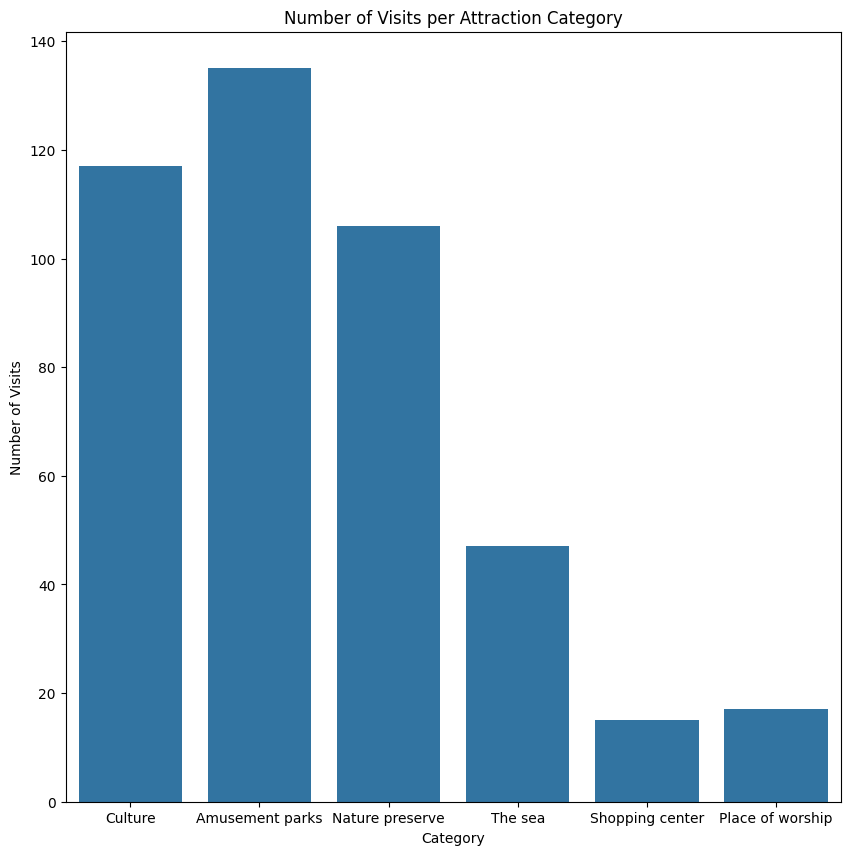

In [ ]:
#Visualize the number of visits for each tourism category to find the most popular category (type) of tourist spot.
plt.figure(figsize=(10,10))
sns.countplot(data=tourism_with_id, x="Category")
plt.ylabel("Number of Visits")
plt.title("Number of Visits per Attraction Category")



> 2. What kind of tourism each city/location is most famous or suitable for ?


In [ ]:
#setting the colors to represent the graph values
color = ['seagreen', 'slateblue', 'darkred', 'saddlebrown']

<ipython-input-29-e229e0d20f78>:3: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=tourism_with_id,x="City",hue="Category",palette=color)


Text(0.5, 1.0, 'Quantity of Visits per City by Type of Attraction')

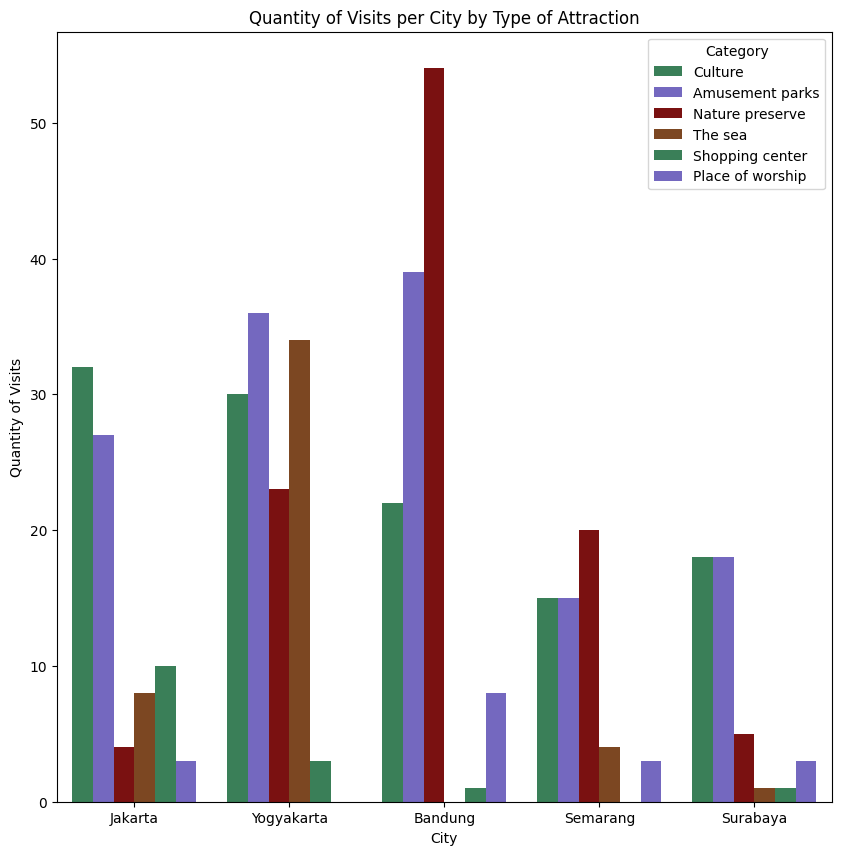

In [ ]:
# Visualize the distribution of the most famous category (type) of tourist spots in each city.
plt.figure(figsize=(10,10))
sns.countplot(data=tourism_with_id,x="City",hue="Category",palette=color)
plt.xlabel("City")
plt.ylabel("Quantity of Visits")
plt.title("Quantity of Visits per City by Type of Attraction")


> 3. Which city would be best for a nature enthusiast to visit?

In [ ]:
# Find the list of category types
tourism_with_id.Category.unique()

array(['Culture', 'Amusement parks', 'Nature preserve', 'The sea',
       'Shopping center', 'Place of worship'], dtype=object)

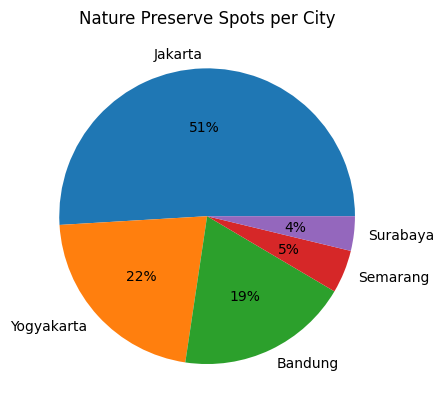

In [ ]:
vc = tourism_with_id[tourism_with_id.Category == "Nature preserve"].City.value_counts()
city_value = tourism_with_id["City"].unique()
# Plot the percentage distribution of tourist spots in each city. In this case, only consider spots categorized as "Nature preserve"
plt.pie(vc, labels=city_value, autopct='%.0f%%')
plt.title("Nature Preserve Spots per City")
plt.show()


> 4. What is the avg price/costing of these places?

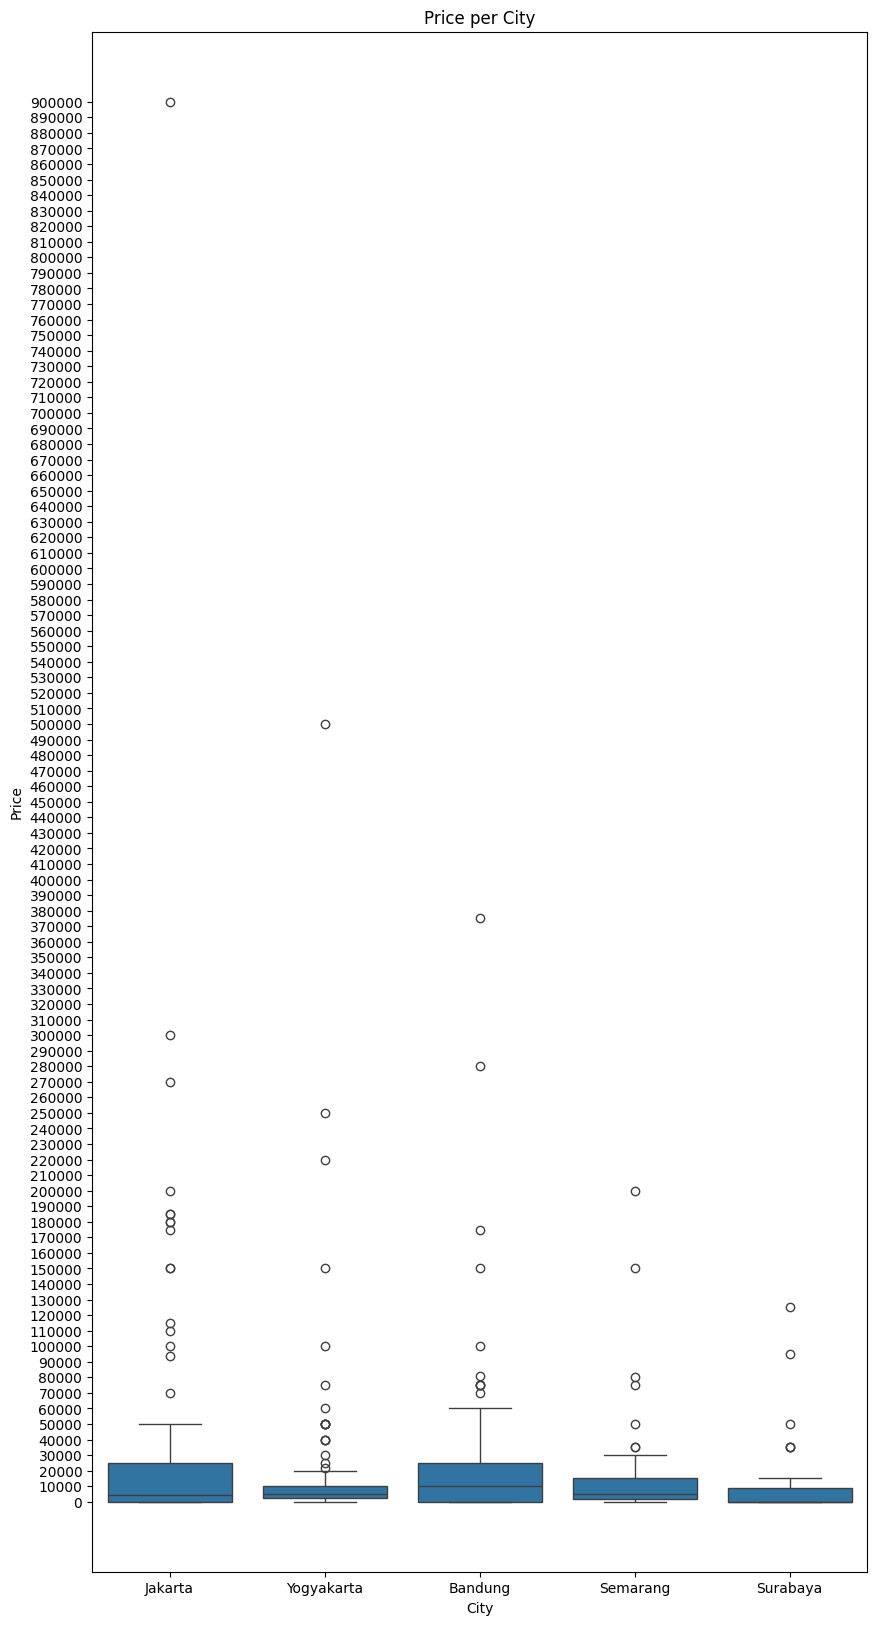

In [ ]:
# Plot the price distribution for these tourist spots
import numpy as np

plt.figure(figsize=(10,20))
sns.boxplot(tourism_with_id,x="City",y="Price")
plt.yticks(np.arange(0, 910000, step=10000))
plt.title("Price per City")
plt.ylabel("Price")
plt.xlabel("City")
plt.show()


##  c. To better understand the tourism ecosystem, we need to create a combined data with places and their ratings.

In [ ]:
tourism_rating.head(2)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2


In [ ]:
tourism_with_id.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Culture,Jakarta,20000,4.6,-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Culture,Jakarta,0,4.6,-6.137645,106.817125


## Calculate weighted average ratings for each place

In [ ]:
# Calculate the weighted average of the 'Place_Ratings' column for each place/location.
tourism_rating_average = tourism_rating.groupby("Place_Id").mean("Place_Ratings")

In [ ]:
# Merge this new average place rating to the tourism_with_id table. Hint: Join on the Place_Id column. Check the head of the new table to confirm the join operation.
tourism_merged = tourism_with_id.join(tourism_rating_average, on='Place_Id')
tourism_merged.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Lat,Long,User_Id,Place_Ratings
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Culture,Jakarta,20000,4.6,-6.175392,106.827153,146.388889,3.722222
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Culture,Jakarta,0,4.6,-6.137645,106.817125,130.400000,2.840000
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Amusement parks,Jakarta,270000,4.6,-6.125312,106.833538,195.684211,2.526316
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Amusement parks,Jakarta,10000,4.5,-6.302446,106.895156,128.952381,2.857143
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Amusement parks,Jakarta,94000,4.5,-6.124190,106.839134,120.320000,3.520000



## d. Use this data to figure out the spots that  are most loved by the tourists.

In [ ]:
tourism_merged.sort_values("Place_Ratings",ascending = False)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Lat,Long,User_Id,Place_Ratings
415,416,Keraton Surabaya,Kawasan yang berjuluk Kampung Keraton ini terd...,Culture,Surabaya,0,4.4,-7.256755,112.794220,145.612903,3.967742
138,139,Puncak Gunung Api Purba - Nglanggeran,Gunung Nglanggeran adalah sebuah gunung di Dae...,Nature preserve,Yogyakarta,10000,4.7,-7.841253,110.543056,150.235294,3.882353
51,52,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Culture,Jakarta,15000,4.5,-6.365136,106.761798,155.000000,3.842105
253,254,Teras Cikapundung BBWS,Teras Cikapundung Bandung sebelumnya merupakan...,Amusement parks,Bandung,0,4.3,-6.884420,107.606834,166.631579,3.789474
96,97,Monumen Yogya Kembali,Museum Monumen Yogya Kembali (bahasa Jawa: Í¶©...,Culture,Yogyakarta,15000,4.5,-7.749590,110.369607,167.454545,3.772727
...,...,...,...,...,...,...,...,...,...,...,...
72,73,Museum Perangko,Museum perangko dibangun dengan bentuk banguna...,Culture,Jakarta,5000,4.4,-6.304184,106.901773,178.238095,2.238095
233,234,Amazing Art World,"Amazing Art World Bandung, sebuah objek wisata...",Culture,Bandung,75000,4.5,-6.851659,107.595553,173.521739,2.217391
208,209,Pantai Sanglen,Pantai Sanglen. Lokasinya berada di Desa Kemad...,The sea,Yogyakarta,10000,4.5,-8.136746,110.571636,133.500000,2.214286
103,104,Tebing Breksi,Tebing Breksi merupakan tempat wisata yang ber...,Culture,Yogyakarta,20000,4.4,-7.781571,110.504583,154.956522,2.173913


## Also, which city has the most loved tourist spots.

- Solution : Picking up the places with average rating above 3.5 as most loved places and finding the cities where most of these highly rated spots are present

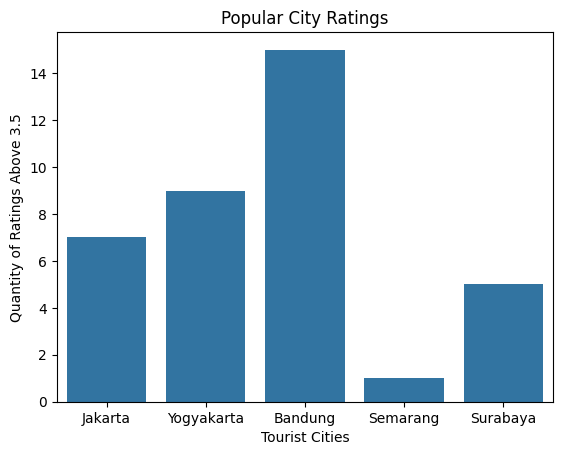

In [ ]:
# Plot the percentage distribution of the cities with the most number of popular tourist spots. A popular tourist spot is defined as a place with an average rating greater than 3.5
popular_spots = tourism_merged[tourism_merged['Place_Ratings'] >= 3.5]
sns.countplot(popular_spots, x="City")
plt.ylabel("Quantity of Ratings Above 3.5")
plt.xlabel("Tourist Cities")
plt.title("Popular City Ratings")
plt.show()


__Observations:__
- Record your observations here.

## e. Indonesia provides a wide range of tourist spots ranging from historical and cultural beauties to advanced amusement parks. What category of places are users liking the most amongst these ?


- Again picking up the places with average rating above 3.5 and finding out the which are the most liked categories

- Most people liking the amusement parks very closely followed by the nature preserve.

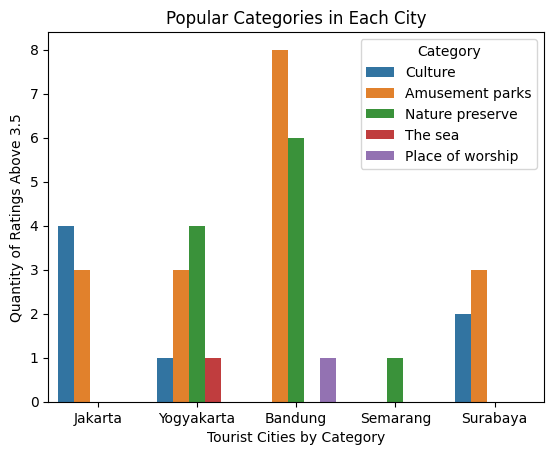

In [ ]:
# Plot the distribution of the popular tourist spots (average ratings > 3.5) across the tourist categories
sns.countplot(popular_spots, x="City", hue="Category")
plt.ylabel("Quantity of Ratings Above 3.5")
plt.xlabel("Tourist Cities by Category")
plt.title("Popular Categories in Each City")
plt.show()

# Build a Recommendation model for the tourists.

- Create a dataframe with information about these spots to include place id, user rating, name, description, category, location and price.


- Use the above data to develop a content based filtering model for recommendation. And use that to recommend other places to visit using the current tourist location(place name).



In [ ]:
# Create the dataframe for the recommender system.
recom_data = tourism_rating.merge(tourism_with_id, on="Place_Id", how="left")

In [ ]:
recom_data = pd.DataFrame(recom_data)
recom_data.head(2)

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Lat,Long
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:Í¶...,Culture,Yogyakarta,75000,4.6,-7.770542,110.489416
1,1,344,2,Pantai Marina,Pantai Marina (bahasa Jawa: Í¶•Í¶±Í¶∂Í¶±Í¶∂Í¶Ç...,The sea,Semarang,3000,4.1,-6.948877,110.389329


In [ ]:
ratings_data = recom_data.groupby(['User_Id', 'Place_Name'])['Place_Ratings'].mean().unstack()

# Normalize user-item matrix
#!pip install scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

ratings_data_copy = ratings_data.copy()
x = ratings_data_copy.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_norm = pd.DataFrame(x_scaled)
#fill NA values
#ratings_data = ratings_data.apply(lambda row: row.fillna(row.mean()), axis=1)
#ratings_data = ratings_data.fillna(0)

In [ ]:
ratings_data

Place_Name,Air Mancur Menari,Air Terjun Kali Pancur,Air Terjun Kedung Pedut,Air Terjun Semirang,Air Terjun Sri Gethuk,Alive Museum Ancol,Alun Alun Selatan Yogyakarta,Alun-Alun Kota Bandung,Alun-alun Utara Keraton Yogyakarta,Amazing Art World,...,Wisata Alam Wana Wisata Penggaron,Wisata Batu Kuda,Wisata Eling Bening,Wisata Kaliurang,Wisata Kampung Krisan Clapar,Wisata Kraton Jogja,Wisata Kuliner Pecenongan,Wisata Lereng Kelir,Wisata Mangrove Tapak,Wot Batu
User_Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
297,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

# create a User similarity matrix using Pearson correlation
user_corr_mat = data_norm.T.corr()
user_corr_mat.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,NaN,NaN,0.981981,NaN,NaN,NaN,1.000000,-1.000000,0.188982,...,NaN,NaN,NaN,-0.192450,NaN,NaN,NaN,-1.000000,-0.379980,NaN
1,NaN,1.000000,-1.0,NaN,0.409644,NaN,NaN,NaN,NaN,1.000000,...,-1.0,-0.188982,NaN,-1.000000,-1.0,-0.5,-0.164771,-1.000000,0.577350,NaN
2,NaN,-1.000000,1.0,NaN,NaN,NaN,NaN,1.000000,-0.654654,NaN,...,NaN,1.000000,NaN,-0.388889,-1.0,NaN,1.000000,1.000000,NaN,NaN
3,0.981981,NaN,NaN,1.000000,NaN,-0.981981,0.333333,1.000000,-1.000000,NaN,...,-1.0,-1.000000,NaN,-1.000000,-1.0,1.0,-1.000000,NaN,0.944911,NaN
4,NaN,0.409644,NaN,NaN,1.000000,0.000000,NaN,-0.029412,-1.000000,1.000000,...,1.0,NaN,-1.0,-0.320750,-1.0,NaN,NaN,0.760726,NaN,-1.0


In [ ]:
# Similarity
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
user_similarity_cosine = cosine_similarity(data_norm.fillna(0))
user_similarity_cosine

array([[1.        , 0.06611512, 0.00496262, ..., 0.04843682, 0.07548075,
        0.04265213],
       [0.06611512, 1.        , 0.03379472, ..., 0.06497003, 0.1713377 ,
        0.00605114],
       [0.00496262, 0.03379472, 1.        , ..., 0.04951693, 0.04409367,
        0.02180162],
       ...,
       [0.04843682, 0.06497003, 0.04951693, ..., 1.        , 0.        ,
        0.05803395],
       [0.07548075, 0.1713377 , 0.04409367, ..., 0.        , 1.        ,
        0.        ],
       [0.04265213, 0.00605114, 0.02180162, ..., 0.05803395, 0.        ,
        1.        ]])

In [ ]:
# Pick a user ID
picked_userid = int(input("What User Number would you like to Identify as?"))
# Remove picked user ID from the candidate list
user_corr_mat.drop(index=(picked_userid), inplace=True)
# Take a look at the data
user_corr_mat.head()

What User Number would you like to Identify as?15


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,NaN,NaN,0.981981,NaN,NaN,NaN,1.000000,-1.000000,0.188982,...,NaN,NaN,NaN,-0.192450,NaN,NaN,NaN,-1.000000,-0.379980,NaN
1,NaN,1.000000,-1.0,NaN,0.409644,NaN,NaN,NaN,NaN,1.000000,...,-1.0,-0.188982,NaN,-1.000000,-1.0,-0.5,-0.164771,-1.000000,0.577350,NaN
2,NaN,-1.000000,1.0,NaN,NaN,NaN,NaN,1.000000,-0.654654,NaN,...,NaN,1.000000,NaN,-0.388889,-1.0,NaN,1.000000,1.000000,NaN,NaN
3,0.981981,NaN,NaN,1.000000,NaN,-0.981981,0.333333,1.000000,-1.000000,NaN,...,-1.0,-1.000000,NaN,-1.000000,-1.0,1.0,-1.000000,NaN,0.944911,NaN
4,NaN,0.409644,NaN,NaN,1.000000,0.000000,NaN,-0.029412,-1.000000,1.000000,...,1.0,NaN,-1.0,-0.320750,-1.0,NaN,NaN,0.760726,NaN,-1.0


In [ ]:
# Number of similar users
n = 10
# User similarity threashold
user_similarity_threshold = 0.3
# Get top n similar users
# Print out top n similar users
corr_user = user_corr_mat.iloc[0]
corr_user.sort_values(ascending=False, inplace=True)
corr_user.dropna(inplace=True)
top10_corr_users = corr_user[1:n+1].index.tolist()

print("top 10 users similar to",picked_userid,f"are {top10_corr_users}")

top 10 users similar to 15 are [123, 249, 77, 79, 85, 88, 89, 242, 124, 263]


In [ ]:
# List the places that the target user has visited and rated
place_user = ratings_data.loc[picked_userid].dropna().index.tolist()
print(f"Here are the places reviewed by user {picked_userid}:{place_user}")

#visited_place_names = place_user['Place_Name'].tolist()

#print(f"Visited places by user {picked_userid}:", visited_place_names)

Here are the places reviewed by user 15:['Air Terjun Kali Pancur', 'Candi Borobudur', 'Curug Cipanas', 'Desa Wisata Lembah Kalipancur', 'Desa Wisata Sungai Code Jogja Kota', 'Gereja Katedral', 'Glamping Lakeside Rancabali', 'Gunung Lalakon', 'Heha Sky View', 'Kampung Wisata Taman Sari', 'Klenteng Sanggar Agung', 'Lava Bantal', 'Ledok Sambi', 'Lembang Park & Zoo', 'Monumen Palagan Ambarawa', 'Mountain View Golf Club', 'Museum Pos Indonesia', 'Museum Tengah Kebun', 'Museum Wayang', 'NuArt Sculpture Park', 'Pantai Kukup', 'Pantai Siung', 'Pasar Baru', 'Pelabuhan Marina', 'Peta Park', 'Pura Giri Natha', 'Sea World', 'Taman Air Mancur Menari Kenjeran', 'Taman Bungkul', 'Taman Kasmaran', 'Tebing Karaton', 'Umbul Sidomukti', 'Waduk Jatibarang', 'Wisata Alam Wana Wisata Penggaron', 'Wisata Lereng Kelir']


In [ ]:
# List the places that similar users visited and rated.
sim_places = []

for user in top10_corr_users:
  place_user_n = ratings_data.loc[user].dropna().index.tolist()
  sim_places.extend(place_user_n)
  print(f"Here are the places reviewed by user {user}:{place_user_n}")

Here are the places reviewed by user 123:['Air Terjun Sri Gethuk', 'Alive Museum Ancol', 'Bukit Moko', 'Curug Aseupan', 'Desa Wisata Rumah Domes/Teletubbies', 'Gunung Papandayan', 'GunungTangkuban perahu', 'Jalan Braga', 'Kampung Batik Gedong Semarang', 'Kampung Wisata Sosro Menduran', 'Kawasan Punclut', 'Kebun Binatang Ragunan', 'Kidzania', 'Lawangwangi Creative Space', 'Masjid Agung Trans Studio Bandung', 'Monumen Bambu Runcing Surabaya', 'Monumen Batik Yogyakarta', 'Museum Fatahillah', 'Museum Gunung Merapi', 'Museum Kebangkitan Nasional', 'Museum Kesehatan Dr. Adhyatma', 'Museum Layang-layang', 'Museum Nike Ardilla', 'Museum Tengah Kebun', 'Pasar Baru', 'Pasar Petak Sembilan', 'Puncak Pinus Becici', 'Sendang Geulis Kahuripan', 'Taman Cattleya', 'Taman Film', 'Taman Mundu', 'Tugu Muda Semarang', 'Water Park Bandung Indah']
Here are the places reviewed by user 249:['Amazing Art World', 'Bukit Moko', 'Curug Anom', 'Flower Farm Setiya Aji', 'Galeri Indonesia Kaya', 'Gedung Sate', 'Geof

Here is a list of places from your top 10 similar users ['Air Terjun Sri Gethuk', 'Alive Museum Ancol', 'Bukit Moko', 'Curug Aseupan', 'Desa Wisata Rumah Domes/Teletubbies', 'Gunung Papandayan', 'GunungTangkuban perahu', 'Jalan Braga', 'Kampung Batik Gedong Semarang', 'Kampung Wisata Sosro Menduran', 'Kawasan Punclut', 'Kebun Binatang Ragunan', 'Kidzania', 'Lawangwangi Creative Space', 'Masjid Agung Trans Studio Bandung', 'Monumen Bambu Runcing Surabaya', 'Monumen Batik Yogyakarta', 'Museum Fatahillah', 'Museum Gunung Merapi', 'Museum Kebangkitan Nasional', 'Museum Kesehatan Dr. Adhyatma', 'Museum Layang-layang', 'Museum Nike Ardilla', 'Pasar Petak Sembilan', 'Puncak Pinus Becici', 'Sendang Geulis Kahuripan', 'Taman Cattleya', 'Taman Film', 'Taman Mundu', 'Tugu Muda Semarang', 'Water Park Bandung Indah', 'Amazing Art World', 'Bukit Moko', 'Curug Anom', 'Flower Farm Setiya Aji', 'Galeri Indonesia Kaya', 'Gedung Sate', 'Geoforest Watu Payung Turunan', 'Kampoeng Rawa', 'Kampung Wisata Sos

Text(0.5, 1.0, 'Number of Reviews by top 10 similar Users')

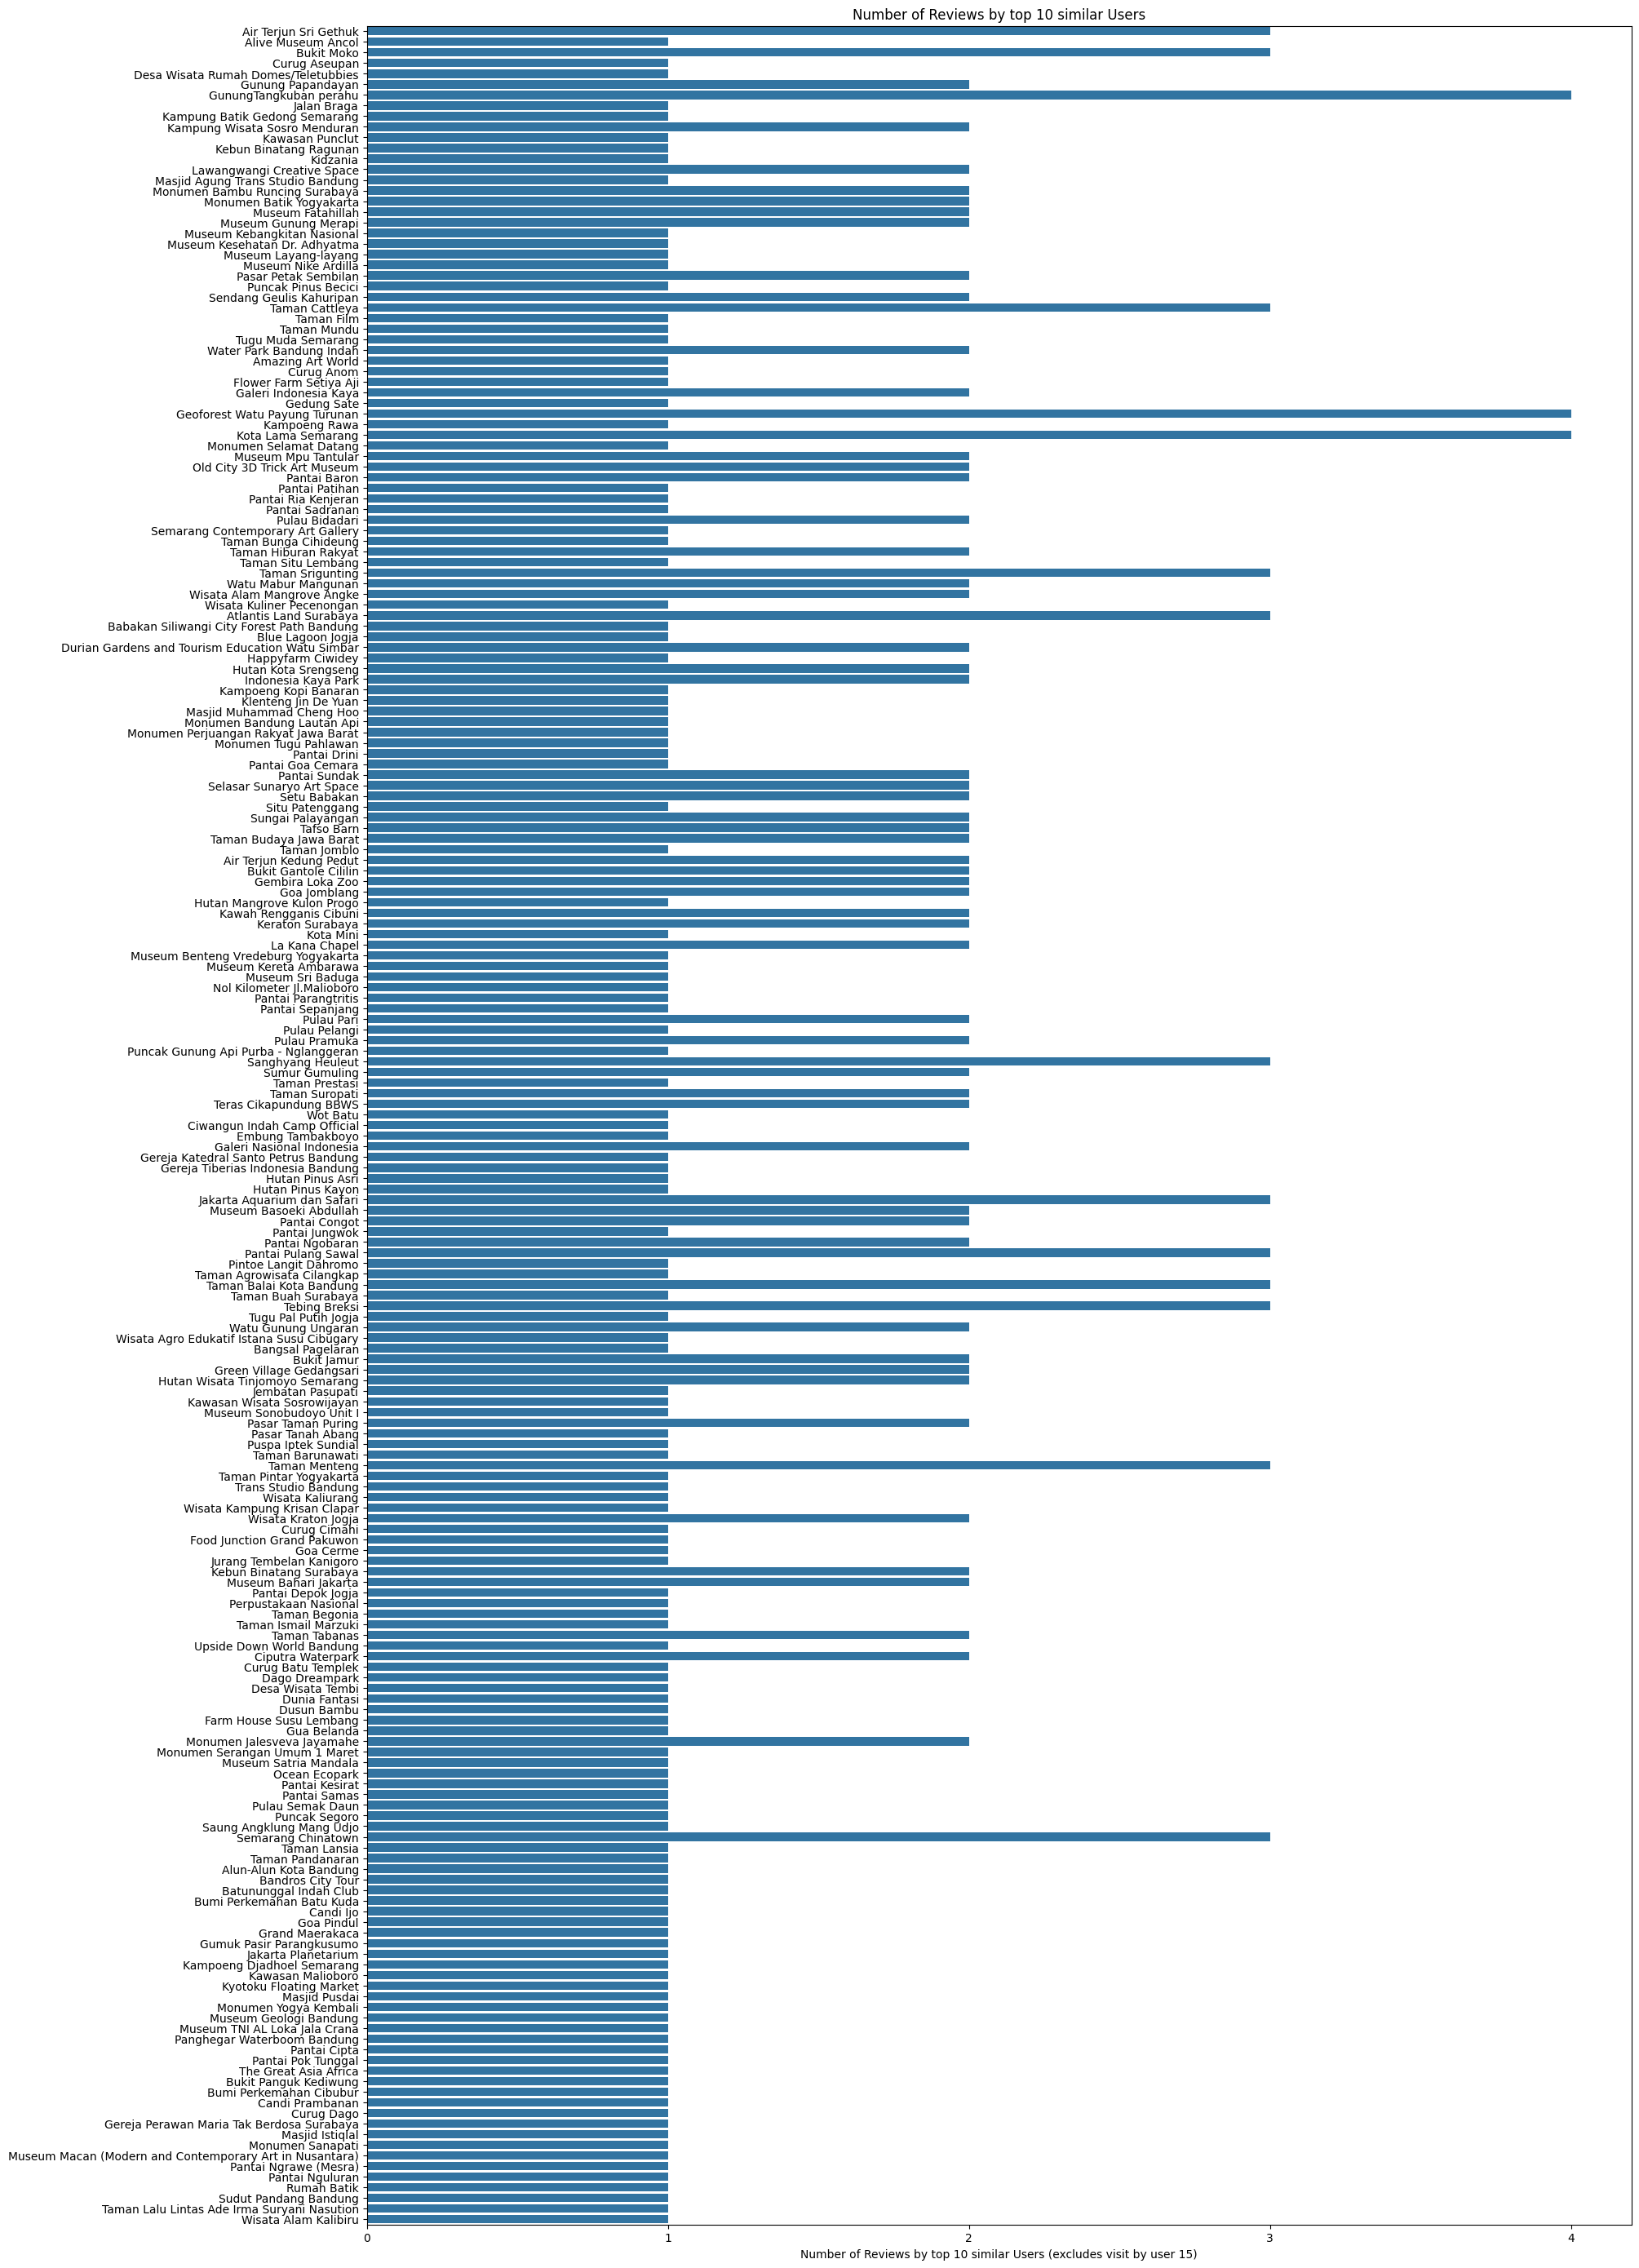

In [ ]:
# Remove the places already visitied
new_places = []

for places in sim_places:
  if places not in place_user:
    new_places.append(places)

#new_places = sorted(new_places)
print("Here is a list of places from your top 10 similar users",new_places)
# Take a look at the data
plt.figure(figsize=(20,35))
sns.countplot(new_places)
plt.xticks(np.arange(0, 5, step=1))
plt.xlabel(f"Number of Reviews by top 10 similar Users (excludes visit by user {picked_userid})")
plt.title("Number of Reviews by top 10 similar Users")

In [ ]:
# A dictionary to store item scores
# Convert dictionary to pandas dataframe
item_scores = {}
# Sort the places by score
for user in top10_corr_users:
  user_scores = ratings_data.loc[user].dropna()
  item_scores.update(user_scores)

item_scores = pd.DataFrame.from_dict(item_scores, orient = 'index', columns=["Ratings"])
#item_scores = item_scores.set_index('Places')
mean_scores = item_scores.groupby(level=0).mean().sort_values(by=["Ratings"], ascending=False)

# Display top m places
m = int(input("Number of Places to recommend: "))
mean_scores.head(m)



Number of Places to recommend: 8


,Ratings
Pasar Baru,5.0
Ciputra Waterpark,5.0
Museum Sri Baduga,5.0
Pantai Kesirat,5.0
Klenteng Sanggar Agung,5.0
Klenteng Jin De Yuan,5.0
Rumah Batik,5.0
Geoforest Watu Payung Turunan,5.0


In [ ]:
git remote add origin https://github.com/elwelch/Tourism-Recommender-System.git
git branch -M main
git push -u origin main

SyntaxError: invalid syntax (<ipython-input-53-831dc1d2bde5>, line 1)